In [15]:
import pandas as pd
from binance.client import Client
import datetime
import mplfinance as mpf

# Replace with Binance API keys
#api_key = 'your_api_key'
#api_secret = 'your_api_secret'

#client = Client(api_key, api_secret)
client = Client()

In [16]:
client.get_all_tickers()[:5]

[{'symbol': 'ETHBTC', 'price': '0.04814000'},
 {'symbol': 'LTCBTC', 'price': '0.00104600'},
 {'symbol': 'BNBBTC', 'price': '0.00859600'},
 {'symbol': 'NEOBTC', 'price': '0.00017230'},
 {'symbol': 'QTUMETH', 'price': '0.00080300'}]

### Define a function to retreive historical bitcoin data, in this case we are retrieving 5 minute intervals

In [17]:
from bot import get_historical_data

In [18]:
# Fetch Bitcoin prices at 5-minute intervals for the last 40 days
symbol = 'BTCEUR'
interval = Client.KLINE_INTERVAL_3MINUTE
days = 40

bitcoin_data = get_historical_data(symbol, interval, days)
bitcoin_data.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
19155,2024-07-27 14:09:00+02:00,62939.85,62999.74,62929.67,62990.90,0.14815,2024-07-27 14:11:59.999000072+02:00,9328.826935,41,0.10113,6367.536086,0
19156,2024-07-27 14:12:00+02:00,62978.85,62978.85,62908.50,62925.28,0.31065,2024-07-27 14:14:59.999000072+02:00,19551.583568,70,0.18894,11891.636958,0
19157,2024-07-27 14:15:00+02:00,62921.16,62962.66,62900.54,62934.84,0.10486,2024-07-27 14:17:59.999000072+02:00,6598.588595,73,0.05673,3570.081259,0
19158,2024-07-27 14:18:00+02:00,62932.10,62988.60,62905.52,62973.29,0.11370,2024-07-27 14:20:59.999000072+02:00,7155.784428,42,0.07940,4996.808456,0
19159,2024-07-27 14:21:00+02:00,62981.07,62984.67,62958.92,62961.24,0.19076,2024-07-27 14:23:59.999000072+02:00,12014.182832,33,0.18065,11377.591365,0


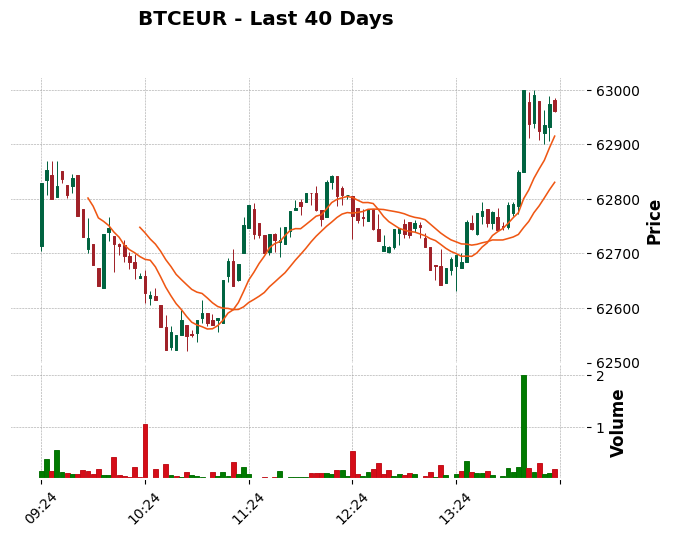

In [19]:
# Plot the data using mplfinance
mpf.plot(bitcoin_data.set_index('Open time').tail(100),
         type='candle',
         volume=True,
         title=f'{symbol} - Last {days} Days',
         style='charles',
         mav = (10,20),
         warn_too_much_data=len(bitcoin_data) + 1
        )